In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(style="ticks")

import pandas as pd

In [3]:
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


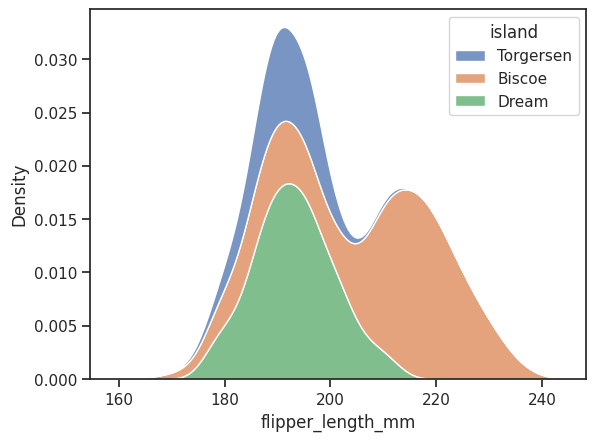

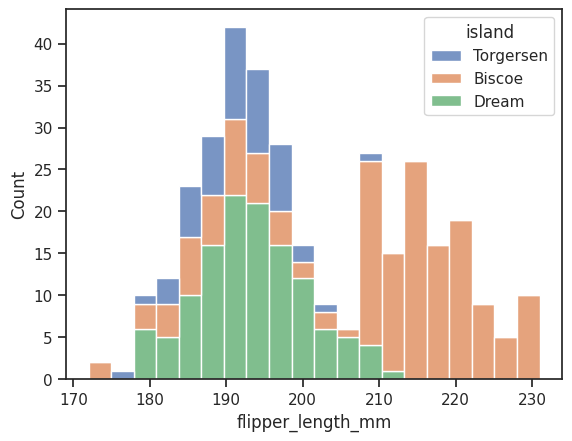

In [7]:
sns.kdeplot(data=df, x="flipper_length_mm", hue="island", multiple="stack")
plt.show()
sns.histplot(data=df, x="flipper_length_mm", hue="island", multiple="stack", bins=20)
plt.show()

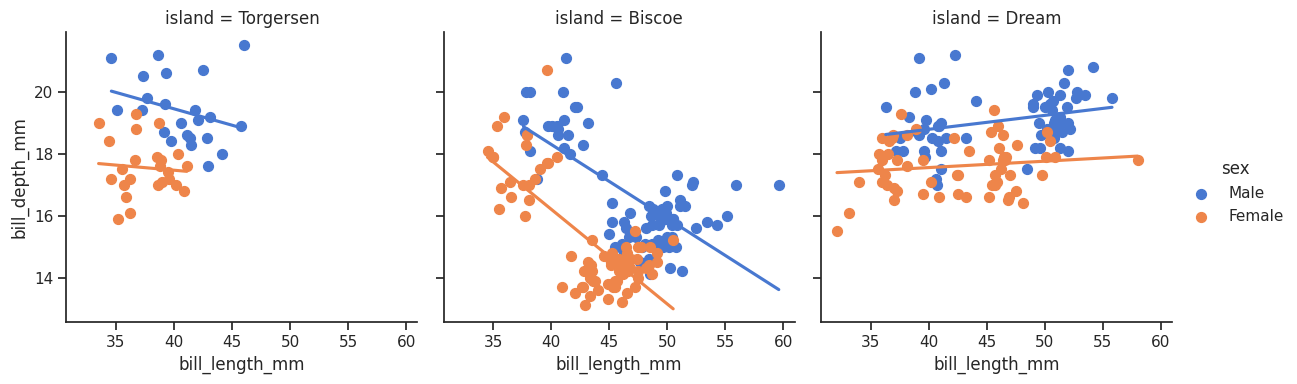

In [ ]:
# Show the results of a linear regression within each dataset
sns.lmplot(
    data=df, x="bill_length_mm", y="bill_depth_mm", col="island", hue="sex",
    palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)

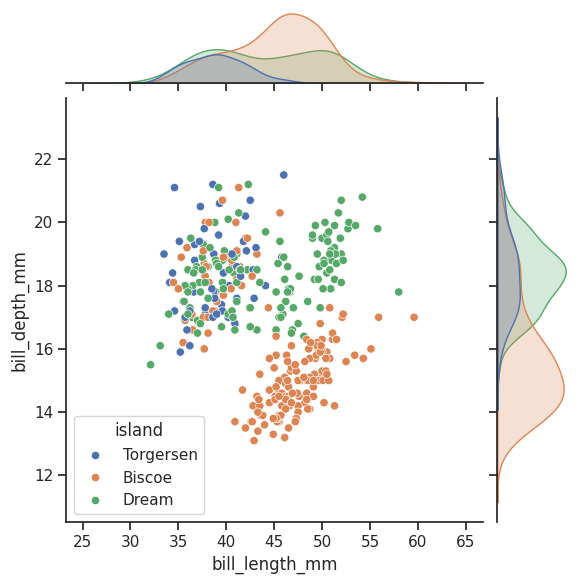

In [ ]:
sns.jointplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="island")

In [ ]:
island_names = df['island'].unique()
print(island_names)

['Torgersen' 'Biscoe' 'Dream']


Penguins at island Torgersen, length mean: 38.95 ± 3.00; median: 38.90
pearsons_skewness: 0.05; sample_skewness:  0.0052


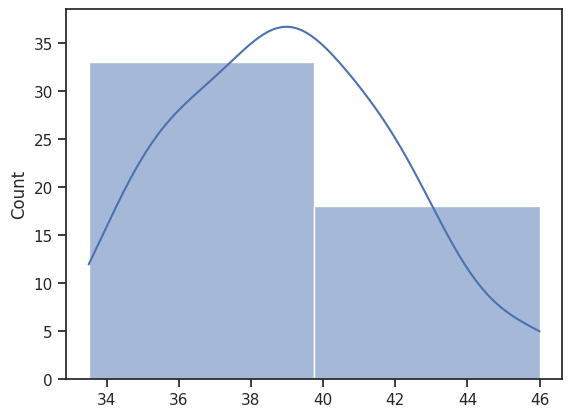

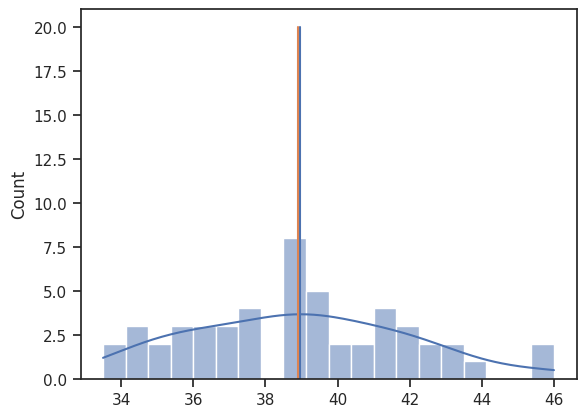

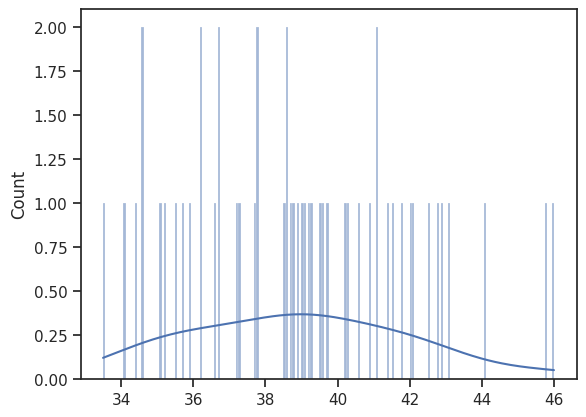

Penguins at island Biscoe, length mean: 45.26 ± 4.76; median: 45.80
pearsons_skewness: -0.34; sample_skewness:  -0.0014


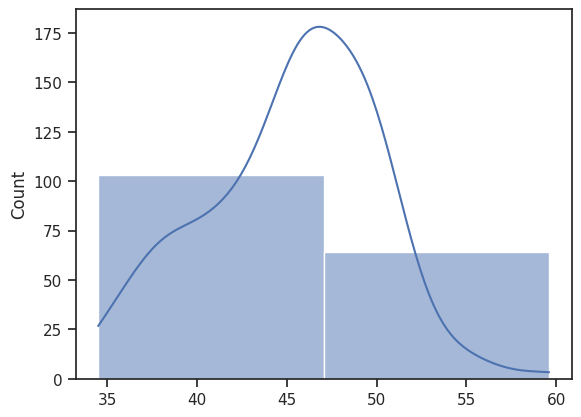

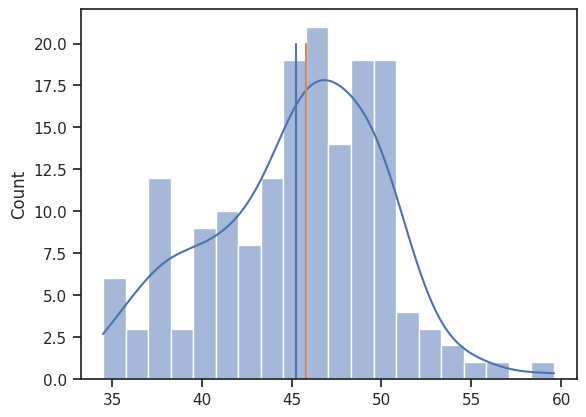

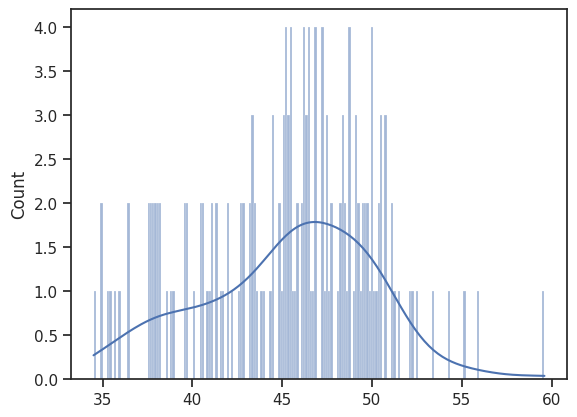

Penguins at island Dream, length mean: 44.17 ± 5.93; median: 44.65
pearsons_skewness: -0.24; sample_skewness:  0.0004


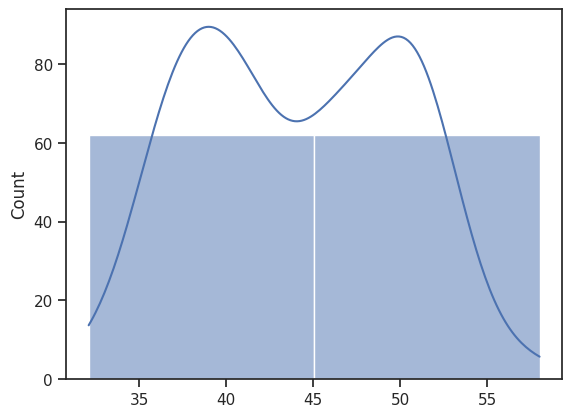

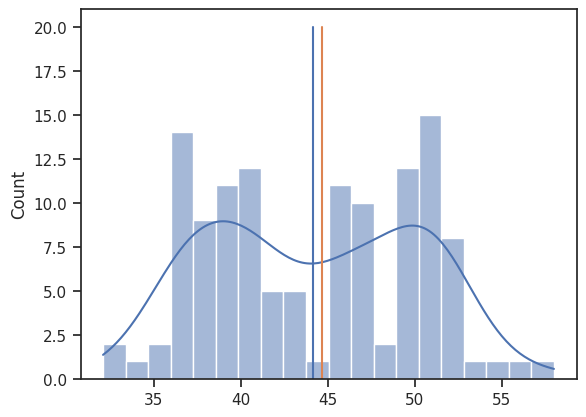

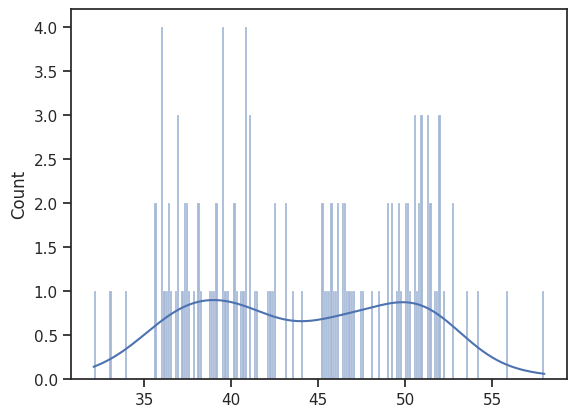

In [ ]:
def pearsons_skewness(mean_val, median_val, std_dev):
    skewness = 3 * (mean_val - median_val) / std_dev
    return skewness


def sample_skewness(data):
    from statistics import mean, stdev
    mean_val = mean(data)
    n = len(data)
    numer = sum((x - mean_val) ** 3 for x in data) / n  # Sum of cubed deviations
    denom = (stdev(data) ** 3)  # Cubed standard deviation
    skewness = (n / ((n - 1) * (n - 2))) * (numer / denom)
    return skewness


for island_name in island_names:
  sub_data = df[df['island'] == island_name]
  length_data = sub_data['bill_length_mm']
  length_data = np.array([v for v in length_data if not np.isnan(v)])
  mean_val, median_val, std_dev = np.mean(length_data), np.median(length_data), np.std(length_data)
  print('Penguins at island %s, length mean: %.2f ± %.2f; median: %.2f' % (island_name, mean_val, std_dev, median_val))
  print('pearsons_skewness: %.2f; sample_skewness:  %.4f' % (pearsons_skewness(mean_val, median_val, std_dev), sample_skewness(length_data)))
  sns.histplot(length_data, bins=2, kde=True)
  plt.show()
  sns.histplot(length_data, bins=20, kde=True)
  plt.plot([mean_val, mean_val], [0, 20])
  plt.plot([median_val, median_val], [0, 20])
  plt.show()
  sns.histplot(length_data, bins=200, kde=True)
  plt.show()

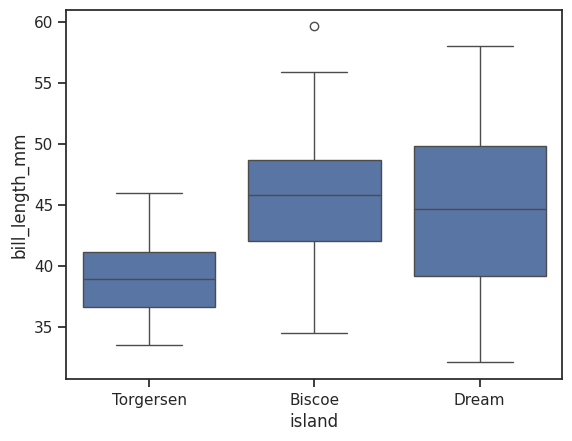

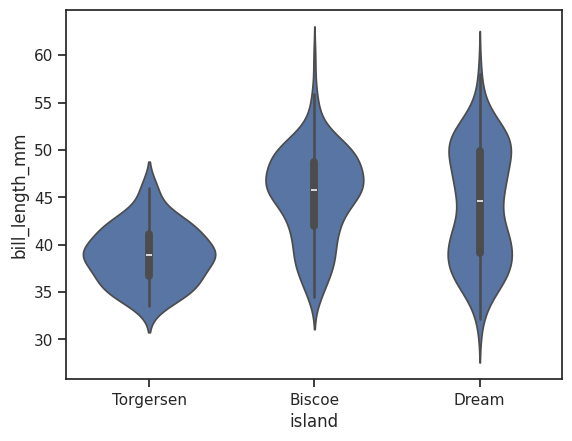

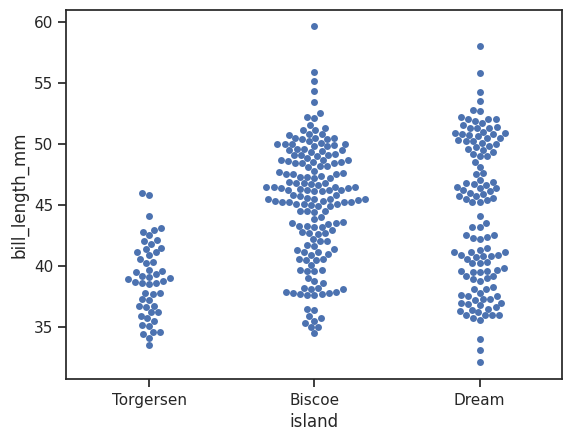

In [ ]:
sns.boxplot(data = df, x = 'island', y = 'bill_length_mm')
plt.show()

sns.violinplot(data = df, x = 'island', y = 'bill_length_mm')
plt.show()

sns.swarmplot(data = df, x = 'island', y = 'bill_length_mm')
plt.show()

In [ ]:
np.array(x)

array([39.5, 37.2, 39.5, 40.9, 36.4, 39.2, 38.8, 42.2, 37.6, 39.8, 36.5,
       40.8, 36. , 44.1, 37. , 39.6, 41.1, 37.5, 36. , 42.3, 37.3, 41.3,
       36.3, 36.9, 38.3, 38.9, 35.7, 41.1, 34. , 39.6, 36.2, 40.8, 38.1,
       40.3, 33.1, 43.2, 36.8, 37.5, 38.1, 41.1, 35.6, 40.2, 37. , 39.7,
       40.2, 40.6, 32.1, 40.7, 37.3, 39. , 39.2, 36.6, 36. , 37.8, 36. ,
       41.5, 46.5, 50. , 51.3, 45.4, 52.7, 45.2, 46.1, 51.3, 46. , 51.3,
       46.6, 51.7, 47. , 52. , 45.9, 50.5, 50.3, 58. , 46.4, 49.2, 42.4,
       48.5, 43.2, 50.6, 46.7, 52. , 50.5, 49.5, 46.4, 52.8, 40.9, 54.2,
       42.5, 51. , 49.7, 47.5, 47.6, 52. , 46.9, 53.5, 49. , 46.2, 50.9,
       45.5, 50.9, 50.8, 50.1, 49. , 51.5, 49.8, 48.1, 51.4, 45.7, 50.7,
       42.5, 52.2, 45.2, 49.3, 50.2, 45.6, 51.9, 46.8, 45.7, 55.8, 43.5,
       49.6, 50.8, 50.2])

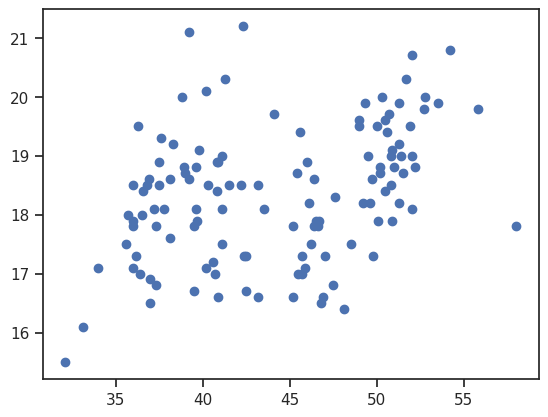

In [ ]:
x = np.array(sub_data['bill_length_mm'])
y = np.array(sub_data['bill_depth_mm'])

plt.scatter(x, y)

0.12866711954804122


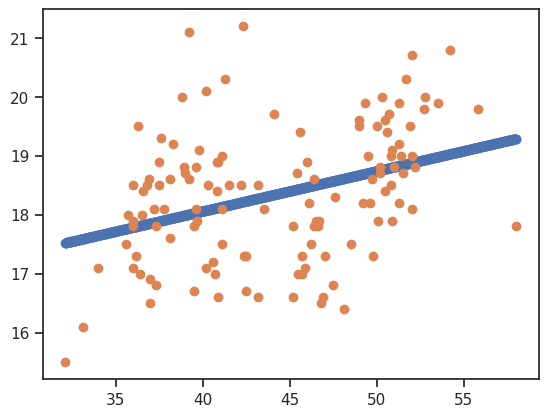

In [ ]:
from sklearn.linear_model import LinearRegression

def simple_feature(x):
  return x.reshape([-1, 1])

feat_x = simple_feature(x)
model = LinearRegression()
model.fit(feat_x, y)
print(model.score(feat_x, y))

plot_x = np.linspace(x.min(), x.max(), 1000)
plot_feat_x = simple_feature(plot_x)
y_pred = model.predict(plot_feat_x)
plt.scatter(plot_x, y_pred)
plt.scatter(x, y)
plt.show()

0.35347116434619974


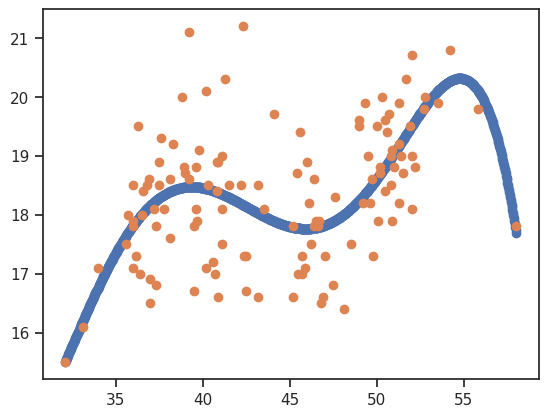

In [ ]:
def polinomial_feature(x):
  return np.stack([x ** 5, x ** 4, x ** 3, x ** 2, x, np.ones(x.shape)], axis=1)


feat_x = polinomial_feature(x)
model = LinearRegression()
model.fit(feat_x, y)
print(model.score(feat_x, y))


plot_x = np.linspace(x.min(), x.max(), 1000)
plot_feat_x = polinomial_feature(plot_x)
y_pred = model.predict(plot_feat_x)
plt.scatter(plot_x, y_pred)
plt.scatter(x, y)
plt.show()

0.22914967048146184


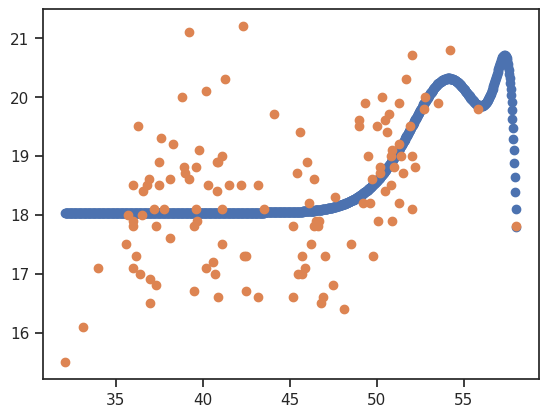

In [ ]:
def polinomial_feature(x, max_degree = 50):
  out_feat = []
  for deg in range(max_degree):
    out_feat += [x ** deg]
  return np.stack(out_feat, axis=1)


feat_x = polinomial_feature(x)
model = LinearRegression()
model.fit(feat_x, y)
print(model.score(feat_x, y))


plot_x = np.linspace(x.min(), x.max(), 1000)
plot_feat_x = polinomial_feature(plot_x)
y_pred = model.predict(plot_feat_x)
plt.scatter(plot_x, y_pred)
plt.scatter(x, y)
plt.show()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [0/1000], Train Loss: 171.44 Valid Loss: 12.14
Epoch [5/1000], Train Loss: 9.98 Valid Loss: 9.41
Epoch [10/1000], Train Loss: 9.91 Valid Loss: 9.32
Epoch [15/1000], Train Loss: 9.83 Valid Loss: 9.24
Epoch [20/1000], Train Loss: 9.76 Valid Loss: 9.16
Epoch [25/1000], Train Loss: 9.69 Valid Loss: 9.08
Epoch [30/1000], Train Loss: 9.62 Valid Loss: 9.00
Epoch [35/1000], Train Loss: 9.55 Valid Loss: 8.92
Epoch [40/1000], Train Loss: 9.48 Valid Loss: 8.85
Epoch [45/1000], Train Loss: 9.41 Valid Loss: 8.77
Epoch [50/1000], Train Loss: 9.35 Valid Loss: 8.69
Epoch [55/1000], Train Loss: 9.28 Valid Loss: 8.62
Epoch [60/1000], Train Loss: 9.21 Valid Loss: 8.55
Epoch [65/1000], Train Loss: 9.15 Valid Loss: 8.48
Epoch [70/1000], Train Loss: 9.09 Valid Loss: 8.40
Epoch [75/1000], Train Loss: 9.02 Valid Loss: 8.33
Epoch [80/1000], Train Loss: 8.96 Valid Loss: 8.26
Epoch [85/1000], Train Loss: 8.90 Valid Loss: 8.20
Epoch [90/1000], Train Loss: 8.84 Valid Loss: 8.13
Epoch [95/1000], Train Loss: 8

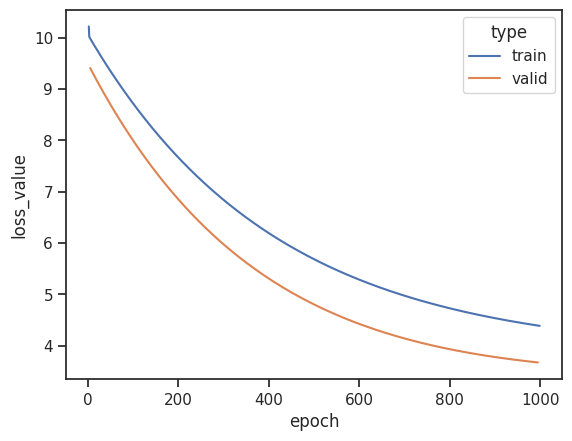

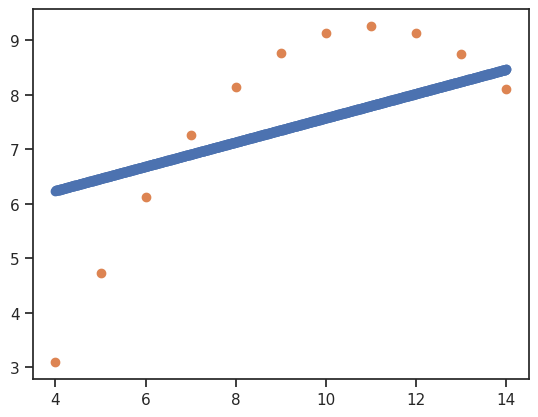

In [ ]:
# This is just demo, not homework. Ask them to try different learning rate and plot final curve, explain why


import torch
import torch.nn as nn
import torch.optim as optim

# Define the model
class LinearRegressionModel(nn.Module):
    def __init__(self, n_feat):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(in_features=n_feat, out_features=1, bias=True)  # One input feature, one output feature

    def forward(self, x):
        return self.linear(x)


def simple_feature(x):
  return x.reshape([-1, 1])


x = torch.Tensor(simple_feature(x))
y = torch.Tensor(np.array(y))

n_train = 8
x_train = x[:n_train]
x_valid = x[n_train:]
y_train = y[:n_train]
y_valid = y[n_train:]

# Initialize the model
model = LinearRegressionModel(n_feat = 1)

# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.006)

# Training loop
num_epochs = 1000
loss_stat = []
for epoch in range(num_epochs):
    # Zero the gradients
    model.train()
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(x_train)

    # Compute loss
    loss = criterion(y_pred, y_train)

    # Backward pass
    loss.backward()

    # Update the parameters
    optimizer.step()
    loss_stat += [[loss.item(), epoch, 'train']]

    if epoch % 5 == 0:
      with torch.no_grad():  # We don't need gradients for validation
        model.eval()
        y_pred = model(x_valid)
        valid_loss = criterion(y_pred, y_valid)

        print(f'Epoch [{epoch}/{num_epochs}], Train Loss: {loss.item():.2f} Valid Loss: {valid_loss.item():.2f}')
        loss_stat += [[valid_loss.item(), epoch, 'valid']]

loss_stat = pd.DataFrame(loss_stat, columns=['loss_value', 'epoch', 'type'])
loss_stat = loss_stat[loss_stat['epoch'] > 1]
sns.lineplot(data=loss_stat, x='epoch', y='loss_value', hue='type')
plt.show()

plot_x = torch.Tensor(simple_feature(np.linspace(x.min(), x.max(), 1000)))

plot_feat_x = simple_feature(plot_x)
y_pred = model(plot_feat_x).detach().numpy()
plt.scatter(plot_x, y_pred)
plt.scatter(x, y)
plt.show()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [0/500], Train Loss: 227.52 Valid Loss: 162.66
Epoch [5/500], Train Loss: 217.22 Valid Loss: 168.09
Epoch [10/500], Train Loss: 207.39 Valid Loss: 148.47
Epoch [15/500], Train Loss: 198.02 Valid Loss: 153.16
Epoch [20/500], Train Loss: 189.08 Valid Loss: 135.57
Epoch [25/500], Train Loss: 180.56 Valid Loss: 139.58
Epoch [30/500], Train Loss: 172.43 Valid Loss: 123.85
Epoch [35/500], Train Loss: 164.69 Valid Loss: 127.22
Epoch [40/500], Train Loss: 157.29 Valid Loss: 113.18
Epoch [45/500], Train Loss: 150.25 Valid Loss: 115.98
Epoch [50/500], Train Loss: 143.53 Valid Loss: 103.48
Epoch [55/500], Train Loss: 137.12 Valid Loss: 105.75
Epoch [60/500], Train Loss: 131.00 Valid Loss: 94.66
Epoch [65/500], Train Loss: 125.17 Valid Loss: 96.44
Epoch [70/500], Train Loss: 119.61 Valid Loss: 86.63
Epoch [75/500], Train Loss: 114.31 Valid Loss: 87.97
Epoch [80/500], Train Loss: 109.25 Valid Loss: 79.33
Epoch [85/500], Train Loss: 104.43 Valid Loss: 80.27
Epoch [90/500], Train Loss: 99.83 Va

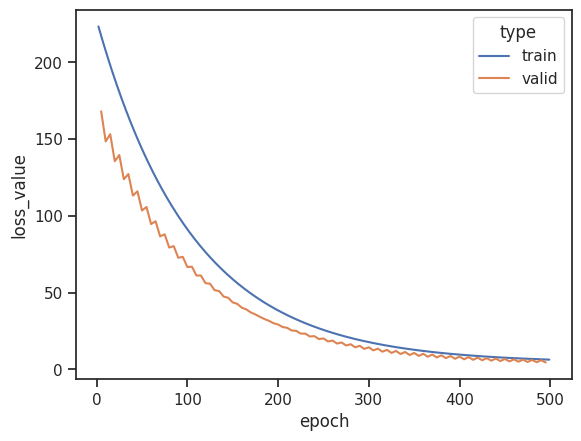

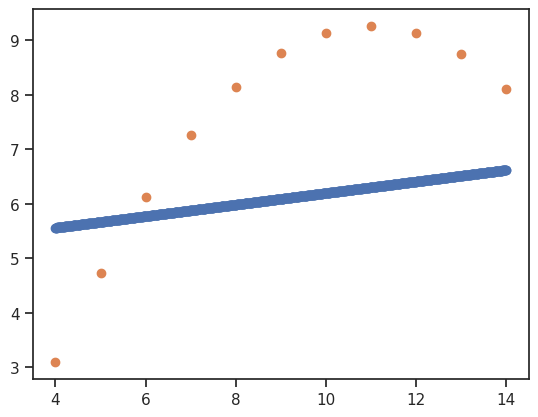

In [ ]:
# This is just demo, not homework. Ask them to try different learning rate and plot final curve, explain why


import torch
import torch.nn as nn
import torch.optim as optim

# Define the model
class LinearRegressionModel(nn.Module):
    def __init__(self, n_feat):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(in_features=n_feat, out_features=1, bias=True)  # One input feature, one output feature

    def forward(self, x):
        return self.linear(x)


def simple_feature(x):
  return x.reshape([-1, 1])


x = torch.Tensor(simple_feature(x))
y = torch.Tensor(np.array(y))

n_train = 8
x_train = x[:n_train]
x_valid = x[n_train:]
y_train = y[:n_train]
y_valid = y[n_train:]

# Initialize the model
model = LinearRegressionModel(n_feat = 1)

# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.0101)

# Training loop
num_epochs = 500
loss_stat = []
for epoch in range(num_epochs):
    # Zero the gradients
    model.train()
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(x_train)

    # Compute loss
    loss = criterion(y_pred, y_train)

    # Backward pass
    loss.backward()

    # Update the parameters
    optimizer.step()
    loss_stat += [[loss.item(), epoch, 'train']]

    if epoch % 5 == 0:
      with torch.no_grad():  # We don't need gradients for validation
        model.eval()
        y_pred = model(x_valid)
        valid_loss = criterion(y_pred, y_valid)

        print(f'Epoch [{epoch}/{num_epochs}], Train Loss: {loss.item():.2f} Valid Loss: {valid_loss.item():.2f}')
        loss_stat += [[valid_loss.item(), epoch, 'valid']]

loss_stat = pd.DataFrame(loss_stat, columns=['loss_value', 'epoch', 'type'])
loss_stat = loss_stat[loss_stat['epoch'] > 1]
sns.lineplot(data=loss_stat, x='epoch', y='loss_value', hue='type')
plt.show()

plot_x = torch.Tensor(simple_feature(np.linspace(x.min(), x.max(), 1000)))

plot_feat_x = simple_feature(plot_x)
y_pred = model(plot_feat_x).detach().numpy()
plt.scatter(plot_x, y_pred)
plt.scatter(x, y)
plt.show()

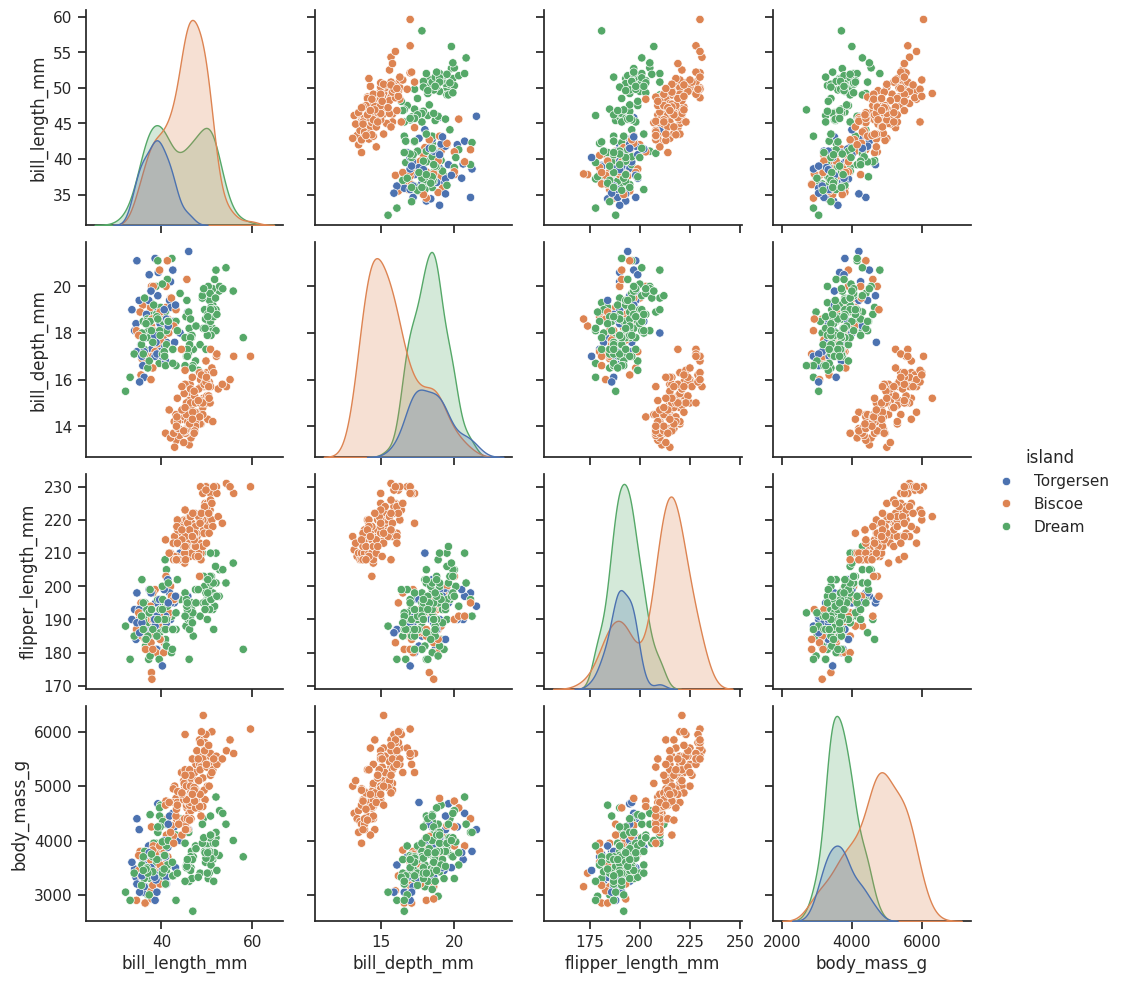

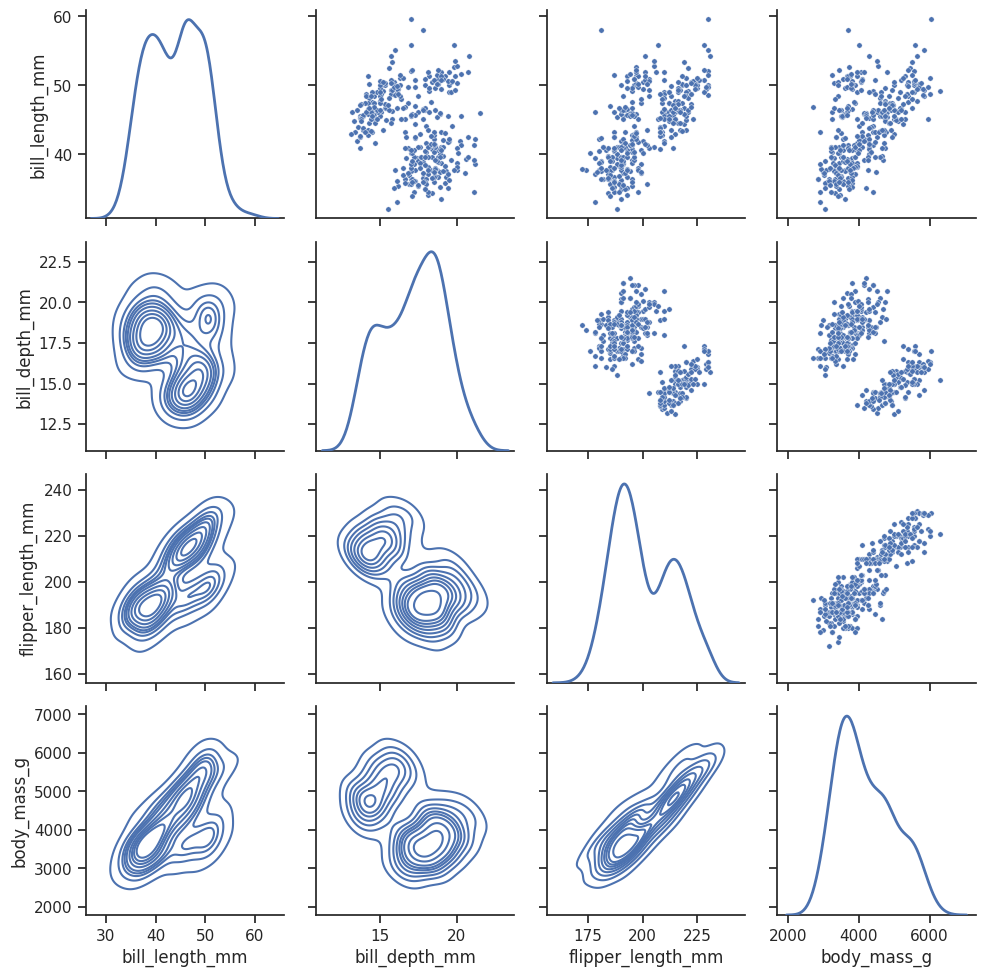

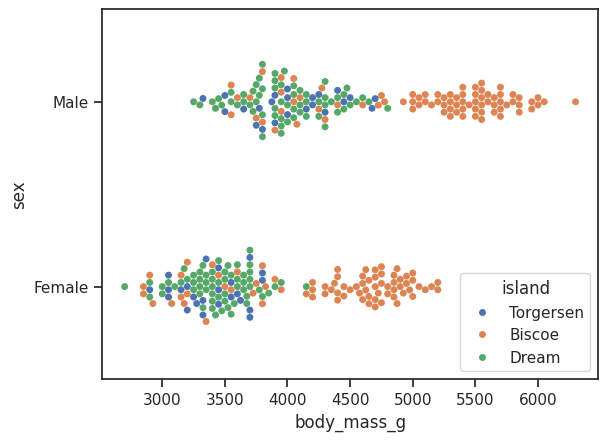

In [ ]:
#@title Other interesting visualizations

sns.pairplot(df, hue="island")
plt.show()

g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

plt.show()

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="body_mass_g", y="sex", hue="island")

plt.show()